In [150]:
import os 

In [151]:
pwd%

'C:\\Users\\xaris\\Desktop\\SQL\\Teen Phone Addiction Project\\Teen_Phone_Addiction'

In [152]:
os.chdir(r"C:\Users\xaris\Desktop\SQL\Teen Phone Addiction Project\\Teen_Phone_Addiction")

In [153]:
pwd%

'C:\\Users\\xaris\\Desktop\\SQL\\Teen Phone Addiction Project\\Teen_Phone_Addiction'

In [154]:
import pandas as pd
df = pd.read_csv(r"artifacts\data_ingestion\extracted_data\teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [155]:
df.shape

(3000, 25)

In [156]:
from pathlib import Path
from dataclasses import dataclass

@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path = Path
    data_path: Path = Path

In [157]:
from Teen_Phone_Addiction.constants import *
from Teen_Phone_Addiction.utils.common import read_yaml, create_directories 

In [158]:
class ConfigurationManager:
    def __init__(
        self, 
        config_file_path = CONFIG_FILE_PATH,
        params_file_path = PARAMS_FILE_PATH,
        schema_file_path = SCHEMA_FILE_PATH): 

        self.config = read_yaml(config_file_path)
        self.params = read_yaml(params_file_path)
        self.schema = read_yaml(schema_file_path)

        create_directories([self.config.artifacts_root])

    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation
        target_column = self.schema.target_column
        create_directories([self.config.artifacts_root])
        data_transformation_config = DataTransformationConfig(
            root_dir = Path(config.root_dir),
            data_path = Path(config.data_path)
        )
        return data_transformation_config



In [159]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [161]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,0,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,0,4,8.7,10.0
1,2,Scott Rodriguez,17,0,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,0,2,5.3,10.0
2,3,Adrian Knox,13,2,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,1,6,5.7,9.2
3,4,Brittany Hamilton,18,0,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,4,8,3.0,9.8
4,5,Steven Smith,14,2,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,2,10,3.7,8.6


In [162]:
#Check for Duplicates
df.duplicated().sum()

#Check for Missing Values
df.isnull().sum()   

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [163]:
#Create New Features
df['Sleep_deficit'] = 8 - df['Sleep_Hours']

In [164]:
# I want the sleep deficit column to be next to the Sleep_Hours column
# Reorder the columns to place 'Sleep_deficit' after 'Sleep_Hours'
cols = list(df.columns)
cols.insert(cols.index("Sleep_Hours") + 1, cols.pop(cols.index("Sleep_deficit")))
df = df[cols]
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Sleep_deficit',
       'Academic_Performance', 'Social_Interactions', 'Exercise_Hours',
       'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

Because we have a lot of features we are in need to reduce them. 
Since as the dimension increases the accuracy of our model will decrease.
I need to follow some steps in order to do this. <br>
-- First step i need to rescale the values in the same unit. This will happen with Standard Scale the Numerical Features.<br>
-- Second step apply PCA algorithm to reduce the dimensionality.

In [165]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Sleep_deficit,Academic_Performance,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,0,Hansonfort,9th,4.0,6.1,1.9,78,...,1.4,86,19,3.6,1.7,1.2,0,4,8.7,10.0
1,2,Scott Rodriguez,17,0,Theodorefort,7th,5.5,6.5,1.5,70,...,0.9,96,9,1.1,4.0,1.8,0,2,5.3,10.0
2,3,Adrian Knox,13,2,Lindseystad,11th,5.8,5.5,2.5,93,...,0.5,137,8,0.3,1.5,0.4,1,6,5.7,9.2
3,4,Brittany Hamilton,18,0,West Anthony,12th,3.1,3.9,4.1,78,...,1.4,128,7,3.1,1.6,0.8,4,8,3.0,9.8
4,5,Steven Smith,14,2,Port Lindsaystad,9th,2.5,6.7,1.3,56,...,1.0,96,20,2.6,0.9,1.1,2,10,3.7,8.6


Index(['Age', 'Gender', 'Daily_Usage_Hours', 'Sleep_Hours', 'Sleep_deficit',
       'Academic_Performance', 'Social_Interactions', 'Exercise_Hours',
       'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')
(3000, 22) (3000, 19)


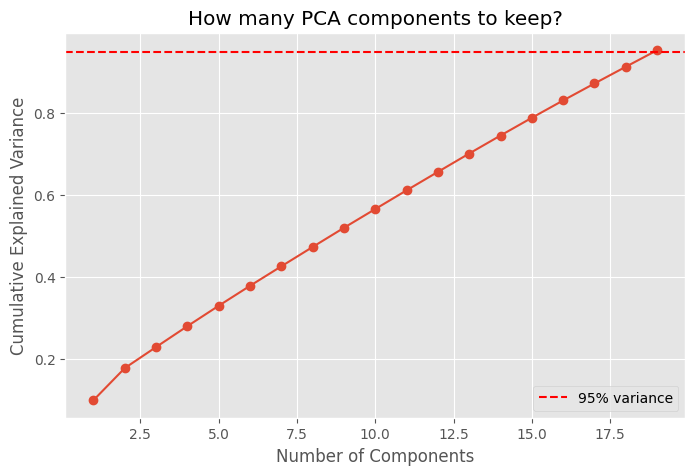

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
# Select numerical columns for scaling
df_selected = df[[col for col in df.columns if col not in ['ID', 'Name', 'Location','School_Grade']]]


# 'ID', 'Name', and 'Location' are identifiers and should not be scaled
print(df_selected.columns)

# Scale the selected numerical features
scaled_data = scaler.fit_transform(df_selected)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca.fit_transform(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape, x_pca.shape)


#Lets plot the PCA components
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many PCA components to keep?')
plt.grid(True)
plt.legend()
plt.show()

We applied PCA to reduce dimensionality while retaining 95 % of the dataset variance.<br> As we can see from the above, the optimanl number of the components to retain is 19 out of 22. This allow us for significant dimensionality reduction with minimal loss of information.

In [171]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,0,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,0,4,8.7,10.0
1,2,Scott Rodriguez,17,0,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,0,2,5.3,10.0
2,3,Adrian Knox,13,2,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,1,6,5.7,9.2
3,4,Brittany Hamilton,18,0,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,4,8,3.0,9.8
4,5,Steven Smith,14,2,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,2,10,3.7,8.6


In [167]:
import os
from Teen_Phone_Addiction import logger
from sklearn.model_selection import train_test_split
import pandas as pd

In [172]:
class DataTransformation:
    def __init__(self, config, df, target_column):
        self.config = config
        self.df = df
        self.target_column = target_column  
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=0.95)

    def preprocess(self):
        # Drop non-numeric/identifier columns
        drop_cols = ['ID', 'Name', 'Location', 'School_Grade']
        features = self.df.drop(columns=drop_cols + [self.target_column])
        target = self.df[self.target_column]  
        
        # Scale
        scaled_data = self.scaler.fit_transform(features)

        # PCA
        x_pca = self.pca.fit_transform(scaled_data)

        return x_pca, target

    def train_test_split_and_save(self):
        X, y = self.preprocess()

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Convert to DataFrames for saving
        train_df = pd.DataFrame(X_train)
        train_df['target'] = y_train.reset_index(drop=True)

        test_df = pd.DataFrame(X_test)
        test_df['target'] = y_test.reset_index(drop=True)

        os.makedirs(self.config.root_dir, exist_ok=True)
        train_df.to_csv(os.path.join(self.config.root_dir, "train.csv"), index=False)
        test_df.to_csv(os.path.join(self.config.root_dir, "test.csv"), index=False)

        print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")


In [176]:
try:
    config_manager = ConfigurationManager()
    data_transformation_config = config_manager.get_data_transformation_config()
    target_column = list(config.schema.target_column.keys())[0]

    df = pd.read_csv(data_transformation_config.data_path)
    
    # Encode categoricals BEFORE passing df to the class
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df['Gender'] = encoder.fit_transform(df['Gender'])
    df['Phone_Usage_Purpose'] = encoder.fit_transform(df['Phone_Usage_Purpose'])
    
    data_transformation = DataTransformation(
        config=data_transformation_config,
        df=df,
        target_column=target_column
    )

    data_transformation.train_test_split_and_save()
except Exception as e:
    raise e


[2025-08-08 12:51:22,030: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-08-08 12:51:22,041: INFO: common: yaml file: params.yaml loaded successfully]
[2025-08-08 12:51:22,048: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-08-08 12:51:22,051: INFO: common: created directory at: artifacts]
[2025-08-08 12:51:22,053: INFO: common: created directory at: artifacts]
Train shape: (2400, 20), Test shape: (600, 20)
